In [0]:
##Question1 Autoencoder

In [0]:
import tensorflow as tf
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

In [0]:
##import fmnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
##we will just normalize pixel values between 0 and 1
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [0]:
import numpy as np
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1)) 
print(x_train.shape)
print(x_test.shape)

In [0]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 48s 799us/step - loss: 0.3700 - val_loss: 0.3330
Epoch 2/50
60000/60000 [==============================] - 45s 754us/step - loss: 0.3248 - val_loss: 0.3168
Epoch 3/50
60000/60000 [==============================] - 45s 751us/step - loss: 0.3141 - val_loss: 0.3084
Epoch 4/50
60000/60000 [==============================] - 48s 802us/step - loss: 0.3079 - val_loss: 0.3066
Epoch 5/50
60000/60000 [==============================] - 46s 759us/step - loss: 0.3042 - val_loss: 0.3063
Epoch 6/50
60000/60000 [==============================] - 47s 787us/step - loss: 0.3016 - val_loss: 0.3018
Epoch 7/50
60000/60000 [==============================] - 50s 841us/step - loss: 0.2997 - val_loss: 0.3017
Epoch 8/50
60000/60000 [==============================] - 49s 813us/step - loss: 0.2984 - val_loss: 0.3048
Epoch 9/50
60000/60000 [==============================] - 52s 873us/step - loss: 0.2971 - val_

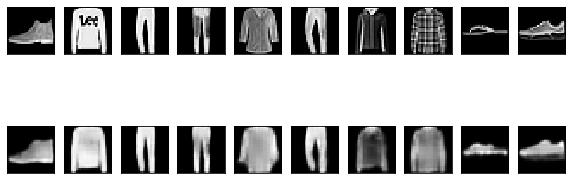

In [0]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(10,4))

for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
###############2.Image Classification##############
#2.1 Deep CNN
#Build a deep CNN to classify the images. 
#Provide a brief description of the architectural choices you’ve made: 
#kernel sizes, strides, padding, network depth. 
#Train your network end-to-end. 
#Report on your model’s performance on training set and test se

In [0]:
For this problem, I use fashion mnist as dataset and build an CNN with 2 convolutional layers, then a max pooling layer, and
a convolutional layer, a flatten layer and dense layer.

The neural network was trained with kernel size 3 by 3, 
simply set the strides with 1, and no padding therefore in code I wrote padding='VALID'

For the result, I filtered with just 5 epochs, and used 128 batches to achieve an accuracy over 98%. 


In [1]:
import tensorflow as tf
import keras
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

np.random.seed(123)

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [4]:
##import fmnist data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Shape check and plotting
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
# ========================
#  Data Munging/Reshaping
# ========================
# Declaring a depth of 1 for fashion MNIST
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

# Setting up calues as float32s that are bounded between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Processing class labels they are currently a numeric vector
# ----> we need to transform them into categories
print(y_train.shape)
print(y_train[:10])

# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
# Check the shape
print(y_train.shape)

(60000,)
[9 0 0 3 0 2 7 2 5 5]
(60000, 10)


In [0]:
# =============================
#  Setting up the Architecture
# ============================
model = Sequential()
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid',
                 input_shape=(28,28,1)))
model.add(Conv2D(filters = 32,kernel_size=(3, 3), 
                 activation='relu', strides=(1, 1), 
                 padding='valid'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
train_1=model.fit(x_train, y_train,
          epochs=5,
          batch_size=128,
          validation_data=(x_test,y_test),
         verbose = 0)
# =====================
#  Evaluating the model
# =====================
score = model.evaluate(x_test, y_test, verbose=1)


10000/10000 [==============================] - 1s 84us/step


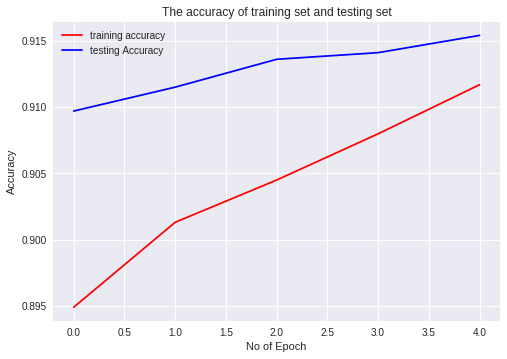

In [19]:
from matplotlib import pyplot as plt
training_accuracy_1=train_1.history['acc']

testing_accuracy_1 = train_1.history['val_acc']
plt.figure()
plt.plot(training_accuracy_1,'r',label='training accuracy')
plt.plot(testing_accuracy_1, 'b', label = 'testing Accuracy')
plt.title('The accuracy of training set and testing set')
plt.xlabel('No of Epoch')
plt.ylabel('Accuracy')
plt.legend()


In [21]:
test_accuracy=score[1]
print("The accuracy of testing set is", test_accuracy)
#train_accuracy=train_1[1]
#print("The accuracy of training set is", train_accuracy)

The accuracy of testing set is 0.9154


In [0]:
#2.2 Transfer Learning
## Transfer learning with VGG backbone

In [0]:
import cv2
from keras.applications import VGG16
from keras.datasets import mnist

from keras.models import Model
from keras.layers import Dense, Flatten, Dropout
import cv2 
from keras import datasets
from keras.optimizers import SGD  
import numpy as np



For this problem, I use pre-trained backbone VGG to do hand written number recognization.It will only transfer the structure but
not parameters

In [0]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


In [25]:
# ========================
#  Data Munging/Reshaping
# ========================
# Declaring a depth of 1 for MNIST
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)

# Setting up calues as float32s that are bounded between 0 and 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Processing class labels they are currently a numeric vector
# ----> we need to transform them into categories
print(y_train.shape)
print(y_train[:10])

# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

(60000,)
[9 0 0 3 0 2 7 2 5 5]


In [0]:
x_train = np.asarray([cv2.resize(i, (32,32)) for i in x_train])
x_test = np.asarray([cv2.resize(i, (32,32)) for i in x_test])

x_train = x_train.reshape(x_train.shape[0], 32, 32,1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

x_train = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in x_train])
x_test = np.asarray([np.squeeze(np.stack((i, )*3, axis = -1)) for i in x_test])

In [28]:
conv_base = VGG16(weights="imagenet",include_top=False,input_shape=(32,32,3))

58892288/58889256 [==============================] - 5s 0us/step


In [35]:
# fit the model
model = Sequential()
model.add(conv_base)
# add our Feature Extractor
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

# freeze the base model weights
conv_base.trainable = False
# compile
model.compile(loss="categorical_crossentropy", 
              optimizer='adam',
              metrics=["acc"])
# fit
train_2 = model.fit(x_train, y_train,
          epochs=30,
          batch_size=128,
          validation_data=(x_test,y_test),
         verbose = 1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 22s 367us/step - loss: 0.5928 - acc: 0.7954 - val_loss: 0.4590 - val_acc: 0.8352
Epoch 2/30
60000/60000 [==============================] - 21s 358us/step - loss: 0.4189 - acc: 0.8473 - val_loss: 0.4218 - val_acc: 0.8485
Epoch 3/30
60000/60000 [==============================] - 21s 358us/step - loss: 0.3863 - acc: 0.8595 - val_loss: 0.4033 - val_acc: 0.8548
Epoch 4/30
60000/60000 [==============================] - 21s 358us/step - loss: 0.3651 - acc: 0.8665 - val_loss: 0.3977 - val_acc: 0.8562
Epoch 5/30
60000/60000 [==============================] - 21s 358us/step - loss: 0.3468 - acc: 0.8725 - val_loss: 0.3886 - val_acc: 0.8605
Epoch 6/30
60000/60000 [==============================] - 21s 357us/step - loss: 0.3353 - acc: 0.8760 - val_loss: 0.3743 - val_acc: 0.8656
Epoch 7/30
60000/60000 [==============================] - 21s 358us/step - loss: 0.3247 - acc: 0.8803 - val_loss: 0.

From the result of training accuracy, I can see that the accuracy has increased over time. With 10 epochs, the training accuracy is around 90% and 20th epoch is approximately 92%, and 30th epoch has reached over 93%

In [36]:
score1 = model.evaluate(x_test, y_test, verbose=1)
test_accuracy1=score1[1]
print("The accuracy of testing set is", test_accuracy1)

10000/10000 [==============================] - 5s 546us/step
The accuracy of testing set is 0.8777


However,I previously got a test accuracy with 10th epoch about 86% and 30th epoch is about 88%. Even though the training accuracy has increased a lot but the testing accuracy didn't improve that much

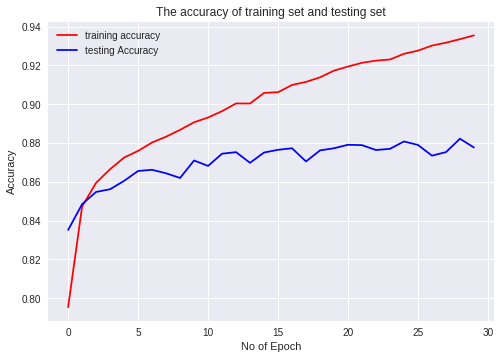

In [37]:
from matplotlib import pyplot as plt
training_accuracy_2=train_2.history['acc']

testing_accuracy_2 = train_2.history['val_acc']
plt.figure()
plt.plot(training_accuracy_2,'r',label='training accuracy')
plt.plot(testing_accuracy_2, 'b', label = 'testing Accuracy')
plt.title('The accuracy of training set and testing set')
plt.xlabel('No of Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [0]:
Finally I can say that by using VGG16 model, and after 30 epochs with 128 batches, the test accuracy of the model 
achieved at 88%. The test accuracy has not improved a lot after the 13th epoch. When comparing to the test accuracy of 
question 2.1, it lowered a little bit and it may be caused by overfitting.

In [0]:
##3.Text Classification
##3.1 RNN

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.layers import SimpleRNN, Embedding

#loading data and checking length
benign=pd.read_csv('benign-urls.txt',header=None)
malicious=pd.read_csv('malicious-urls.txt',header=None)
print(len(benign))
print(len(malicious))

Using TensorFlow backend.


66057
1296


In [0]:
type(benign)

pandas.core.frame.DataFrame

In [0]:
##label text
benign['label']=0
malicious['label']=1

In [0]:
#concat both sets and make labels
url=pd.concat([benign,malicious])
url.columns=['url','label']
url.rename_axis(None)
url.head()

,url,label
0,# GOOGLE,0
1,.0.blogger.gmodules.com,0
2,.0.client-channel.google.com,0
3,.0.docs.google.com,0
4,.0.drive.google.com,0


In [0]:
#split into training and test data
X_train,X_test,Y_train,Y_test = train_test_split(url['url'],url['label'],test_size=0.15)

In [0]:
X_train.shape


(57250,)

In [0]:
X_test.shape

(10103,)

In [0]:
from keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(char_level=True)
tokenizer.fit_on_texts(X_train)

In [0]:
sequences=tokenizer.texts_to_sequences(X_train)
X_train=sequence.pad_sequences(sequences,maxlen=86)

In [0]:
sequences_2=tokenizer.texts_to_sequences(X_test)
X_test=sequence.pad_sequences(sequences_2,maxlen=86)

In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(57250, 86)
(57250,)
(10103, 86)
(10103,)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.layers.recurrent import LSTM


model = Sequential()
# embedding layer
model.add(Embedding(86, 64))
# LSTM
model.add(LSTM(128))
model.add(Dense(1, activation ='sigmoid'))

model.compile(optimizer = 'rmsprop',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

train_1 = model.fit(X_train, Y_train, 
                    validation_data=(X_test,Y_test),
                    epochs = 5, batch_size = 128, 
                    verbose=1)

Train on 57250 samples, validate on 10103 samples
Epoch 1/5
57250/57250 [==============================] - 115s 2ms/step - loss: 0.0672 - acc: 0.9792 - val_loss: 0.0795 - val_acc: 0.9644
Epoch 2/5
57250/57250 [==============================] - 112s 2ms/step - loss: 0.0278 - acc: 0.9866 - val_loss: 0.0267 - val_acc: 0.9882
Epoch 3/5
57250/57250 [==============================] - 114s 2ms/step - loss: 0.0243 - acc: 0.9881 - val_loss: 0.0247 - val_acc: 0.9889
Epoch 4/5
57250/57250 [==============================] - 109s 2ms/step - loss: 0.0234 - acc: 0.9892 - val_loss: 0.0256 - val_acc: 0.9892
Epoch 5/5
57250/57250 [==============================] - 102s 2ms/step - loss: 0.0224 - acc: 0.9891 - val_loss: 0.0254 - val_acc: 0.9901


<Figure size 432x288 with 0 Axes>

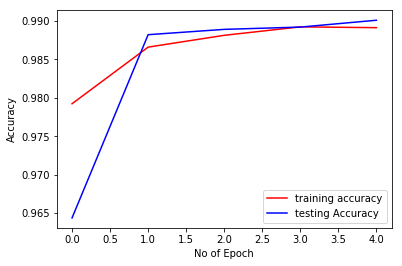

<Figure size 432x288 with 0 Axes>

In [0]:
from matplotlib import pyplot as plt
training_accuracy_1=train_1.history['acc']
testing_accuracy_1 = train_1.history['val_acc']

plt.plot(training_accuracy_1,'r',label='training accuracy')
plt.plot(testing_accuracy_1, 'b', label = 'testing Accuracy')
fig.suptitle('The accuracy of training set and testing set')
plt.xlabel('No of Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Embedding
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, UpSampling2D
from keras.utils import np_utils

In [0]:
##3.2 CNN
model1 = Sequential()
model1.add(Embedding(86, input_length = 86, output_dim = 32))

model1.add(Conv1D(32, 3,
                 activation='relu'))
model1.add(Dropout(0.5))

model1.add(Conv1D(64, 5, 
                 activation='relu'))

model1.add(Flatten())    
model1.add(Dense(1, activation ='sigmoid'))

model1.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics=['acc'])

train_2 = model1.fit(X_train, Y_train, 
                      validation_data=(X_test,Y_test),
                    epochs = 5, batch_size = 128, 
                    verbose=1)

Train on 57250 samples, validate on 10103 samples
Epoch 1/5
57250/57250 [==============================] - 11s 187us/step - loss: 0.0740 - acc: 0.9807 - val_loss: 0.0385 - val_acc: 0.9837
Epoch 2/5
57250/57250 [==============================] - 10s 172us/step - loss: 0.0332 - acc: 0.9852 - val_loss: 0.0300 - val_acc: 0.9842
Epoch 3/5
57250/57250 [==============================] - 10s 173us/step - loss: 0.0253 - acc: 0.9875 - val_loss: 0.0238 - val_acc: 0.9898
Epoch 4/5
57250/57250 [==============================] - 10s 171us/step - loss: 0.0227 - acc: 0.9890 - val_loss: 0.0226 - val_acc: 0.9901
Epoch 5/5
57250/57250 [==============================] - 10s 168us/step - loss: 0.0210 - acc: 0.9900 - val_loss: 0.0231 - val_acc: 0.9905


<Figure size 432x288 with 0 Axes>

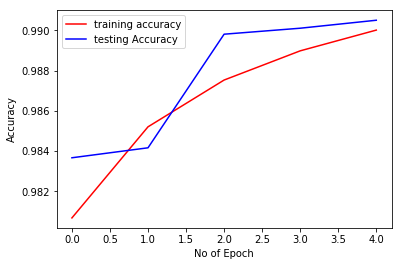

<Figure size 432x288 with 0 Axes>

In [0]:
from matplotlib import pyplot as plt
training_accuracy_2=train_2.history['acc']
testing_accuracy_2 = train_2.history['val_acc']


plt.plot(training_accuracy_2,'r',label='training accuracy')
plt.plot(testing_accuracy_2, 'b', label = 'testing Accuracy')
fig.suptitle('The accuracy of training set and test set')
plt.xlabel('No of Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

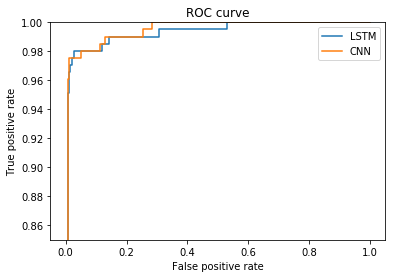

In [0]:
#3.3 comparing two methods
from sklearn.metrics import roc_curve
pred_lstm=model.predict(X_test)
pred_cnn=model1.predict(X_test)

fpr,tpr,thresholds=roc_curve(Y_test,pred_lstm)
fpr2,tpr2,thresholds2=roc_curve(Y_test,pred_cnn)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label='LSTM')
plt.plot(fpr2, tpr2, label='CNN')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.ylim(.85, 1)
plt.title('ROC curve')
plt.legend()
plt.show()